<a href="https://colab.research.google.com/github/matiasvial/Random-Forest-Classifier/blob/master/CNNanimales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from tensorflow.keras.models import Sequential 
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dropout, Flatten, Dense  
from tensorflow.keras import applications  
from keras.utils.np_utils import to_categorical  
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math  
import datetime
import time

In [ ]:
#Se definen las medidas de la imagen
img_width, img_height = 224, 224  
   
#Se crea un archivo .h5 como cuello de boetlla
top_model_weights_path = 'bottleneck_fc_model.h5' 

# Cargamos nuestro data sets
train_data_dir = '/content/drive/MyDrive/Photosintesis/dataprocesada/train'  
validation_data_dir = '/content/drive/MyDrive/Photosintesis/dataprocesada/val'  
test_data_dir = '/content/drive/MyDrive/Photosintesis/dataprocesada/test'
   
# Número de épocas
epochs = 7 #Este valor se puede cambiar para aumentar la precisión del modelo  
# A mayor valor más lento será el entrenamiento
batch_size = 50  

In [ ]:
#Modelo VGG16
vgg16 = VGG16(include_top=False, weights='imagenet') 

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
datagen = ImageDataGenerator(rescale=1. / 255)  #Escala a 1/255

In [ ]:
start = datetime.datetime.now()
   
generator = datagen.flow_from_directory(  
     train_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_train_samples = len(generator.filenames)  
num_classes = len(generator.class_indices)  
   
predict_size_train = int(math.ceil(nb_train_samples / batch_size))  
   
bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train)  
   
np.save('bottleneck_features_train.npy', bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 283 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  from ipykernel import kernelapp as app


Time:  0:01:58.182018


In [ ]:
#Entrenamiento de validación

start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     validation_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_validation_samples = len(generator.filenames)  
   
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))  
   
bottleneck_features_validation = vgg16.predict_generator(  
     generator, predict_size_validation)  
   
np.save('bottleneck_features_validation.npy', bottleneck_features_validation) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)
print('-'*117)

Found 94 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  app.launch_new_instance()


Time:  0:00:56.936797
---------------------------------------------------------------------------------------------------------------------


In [ ]:
#Entrenamiento test

start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     test_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_test_samples = len(generator.filenames)  
   
predict_size_test = int(math.ceil(nb_test_samples / batch_size))  
   
bottleneck_features_test = vgg16.predict_generator(  
     generator, predict_size_test)  
   
np.save('bottleneck_features_test.npy', bottleneck_features_test) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 95 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  app.launch_new_instance()


Time:  0:00:56.073799


In [ ]:
#Entrenando
generator_top = datagen.flow_from_directory(  
         train_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
# Cargamos 
train_data = np.load('bottleneck_features_train.npy')  
   
# Cargar etiquetas 
train_labels = generator_top.classes  
   
# Etiquetas a categoricals
train_labels = to_categorical(train_labels, num_classes=num_classes) 

Found 283 images belonging to 3 classes.


In [ ]:
#Data de validación
generator_top = datagen.flow_from_directory(  
         validation_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_validation_samples = len(generator_top.filenames)  
   
validation_data = np.load('bottleneck_features_validation.npy')  
   

validation_labels = generator_top.classes  
validation_labels = to_categorical(validation_labels, num_classes=num_classes)  

Found 94 images belonging to 3 classes.


In [ ]:
#Testing data
generator_top = datagen.flow_from_directory(  
         test_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_test_samples = len(generator_top.filenames)  
   
test_data = np.load('bottleneck_features_test.npy')  
   

test_labels = generator_top.classes  
test_labels = to_categorical(test_labels, num_classes=num_classes)

Found 95 images belonging to 3 classes.


In [ ]:
#Este es el modelo propuesto con una capa secuencial, flatten, dense, dropout, dense, droput, dense
start = datetime.datetime.now()
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3)))  
model.add(Dropout(0.5))  
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3)))  
model.add(Dropout(0.3)) 
model.add(Dense(num_classes, activation='softmax'))  

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])  

history = model.fit(train_data, train_labels,  
      epochs=7,
      batch_size=batch_size,  
      validation_data=(validation_data, validation_labels))  

model.save_weights(top_model_weights_path)  

(eval_loss, eval_accuracy) = model.evaluate(  
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Epoch 1/7


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


6/6 [==============================] - 2s 56ms/step - loss: 1.0991 - acc: 0.5689 - val_loss: 0.5799 - val_acc: 0.7979
Epoch 2/7
6/6 [==============================] - 0s 15ms/step - loss: 0.6026 - acc: 0.7668 - val_loss: 0.4352 - val_acc: 0.8085
Epoch 3/7
6/6 [==============================] - 0s 14ms/step - loss: 0.4108 - acc: 0.8304 - val_loss: 0.3300 - val_acc: 0.8830
Epoch 4/7
6/6 [==============================] - 0s 15ms/step - loss: 0.4297 - acc: 0.8445 - val_loss: 0.3109 - val_acc: 0.9255
Epoch 5/7
6/6 [==============================] - 0s 17ms/step - loss: 0.3794 - acc: 0.8622 - val_loss: 0.2604 - val_acc: 0.9362
Epoch 6/7
6/6 [==============================] - 0s 15ms/step - loss: 0.2683 - acc: 0.9081 - val_loss: 0.2404 - val_acc: 0.9468
Epoch 7/7
2/2 [==============================] - 0s 10ms/step - loss: 0.2409 - acc: 0.8830
[INFO] accuracy: 88.30%
[INFO] Loss: 0.24088603258132935
Time:  0:00:02.752541


In [ ]:
#Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 100)               2508900   
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 153       
                                                                 
Total params: 2,514,103
Trainable params: 2,514,103
Non-

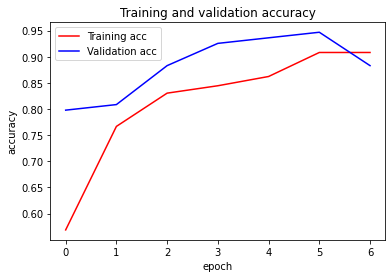

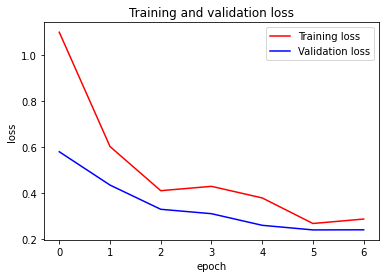

In [ ]:
#Graficando entrenamiento y validación
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_data, test_labels)

3/3 [==============================] - 0s 7ms/step - loss: 0.3613 - acc: 0.8947


[0.36127692461013794, 0.8947368264198303]

In [ ]:
print('test data', test_data)
preds = np.round(model.predict(test_data),0) 

print('rounded test_labels', preds)

test data [[[[2.41681576e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    7.47299373e-01 0.00000000e+00]
   [1.74316704e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    9.63732123e-01 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    9.90154028e-01 0.00000000e+00]
   ...
   [0.00000000e+00 0.00000000e+00 9.41909552e-02 ... 0.00000000e+00
    6.31551266e-01 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    5.55432022e-01 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    7.18425989e-01 0.00000000e+00]]

  [[1.43414557e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    6.80819094e-01 0.00000000e+00]
   [5.62855452e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    8.40644062e-01 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    1.08457971e+00 0.00000000e+00]
   ...
   [0.00000000e+00 0.00000000e+00 3.54814470e-0

In [ ]:
animals = ['falso', 'mamiferos', 'pajarochico']
classification_metrics = metrics.classification_report(test_labels, preds, target_names=animals )
print(classification_metrics)

              precision    recall  f1-score   support

       falso       0.00      0.00      0.00        10
   mamiferos       0.98      1.00      0.99        49
 pajarochico       0.81      0.97      0.89        36

   micro avg       0.90      0.88      0.89        95
   macro avg       0.60      0.66      0.63        95
weighted avg       0.81      0.88      0.85        95
 samples avg       0.88      0.88      0.88        95



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Since our data is in dummy format we put the numpy array into a dataframe and call idxmax axis=1 to return the column
# label of the maximum value thus creating a categorical variable
#Basically, flipping a dummy variable back to it's categorical variable
categorical_test_labels = pd.DataFrame(test_labels).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)

In [ ]:
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

In [ ]:
#Visualizar matriz de confusión
def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
#     print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


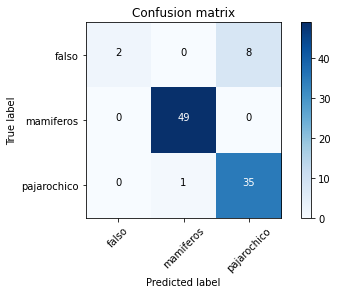

In [ ]:
plot_confusion_matrix(confusion_matrix, ['falso', 'mamiferos', 'pajarochico'])

Normalized confusion matrix


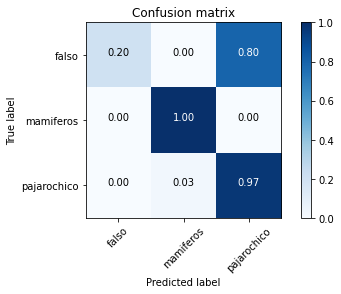

In [ ]:
#Matriz de confusión, en esta matriz se da cuenta que debemos entrenar al modelo con más imagenes falsas. Hay muchos falso positivos de falso que confunde con pajarochico
plot_confusion_matrix(confusion_matrix, 
                      ['falso', 'mamiferos', 'pajarochico'],
                     normalize=True)

In [ ]:
def read_image(file_path):
    print("[INFO] loading and preprocessing image...")  
    image = load_img(file_path, target_size=(224, 224))  
    image = img_to_array(image)  
    image = np.expand_dims(image, axis=0)
    image /= 255.  
    return image

In [ ]:
def test_single_image(path):
    animals = ['falso', 'mamifero', 'pajarochico']
    images = read_image(path)
    time.sleep(.5)
    bt_prediction = vgg16.predict(images)  
    preds = model.predict(bt_prediction)
    for idx, animal, x in zip(range(0,6), animals , preds[0]):
        print("ID: {}, Label: {} {}%".format(idx, animal, round(x*100,2) ))
    print('Final Decision:')
    time.sleep(.5)
 
      

In [ ]:
path = '/content/drive/MyDrive/Photosintesis/dataprocesada/test/pudu_puda.jpeg'

In [ ]:
import os
ejemplo_dir = '/content/drive/MyDrive/Photosintesis/dataprocesada/test'
with os.scandir(ejemplo_dir) as ficheros:
    for fichero in ficheros:
        print(fichero.name)

pajarochico
falso
mamiferos
Huillinprueba.jpg
Pudu.jpg
Gatoandino.jpg
gato2.jpg
pajaro2.jfif
pajaro1.jfif
puma1.jpeg
puma2.jpeg
mamiferosCuti0200031.JPG
mamiferosCuti0200005.JPG
mamiferosCuti0600009.JPG
mamiferosCuti0200073.JPG
WhatsApp Image 2022-01-07 at 10.28.33 PM.jpeg
miron.jpeg
zorro_culpeo.jpg
gato_stgo.jpeg
pudu_puda.jpeg


In [ ]:
test_single_image(path)

[INFO] loading and preprocessing image...
ID: 0, Label: falso 0.12%
ID: 1, Label: mamifero 98.9%
ID: 2, Label: pajarochico 0.98%
Final Decision:


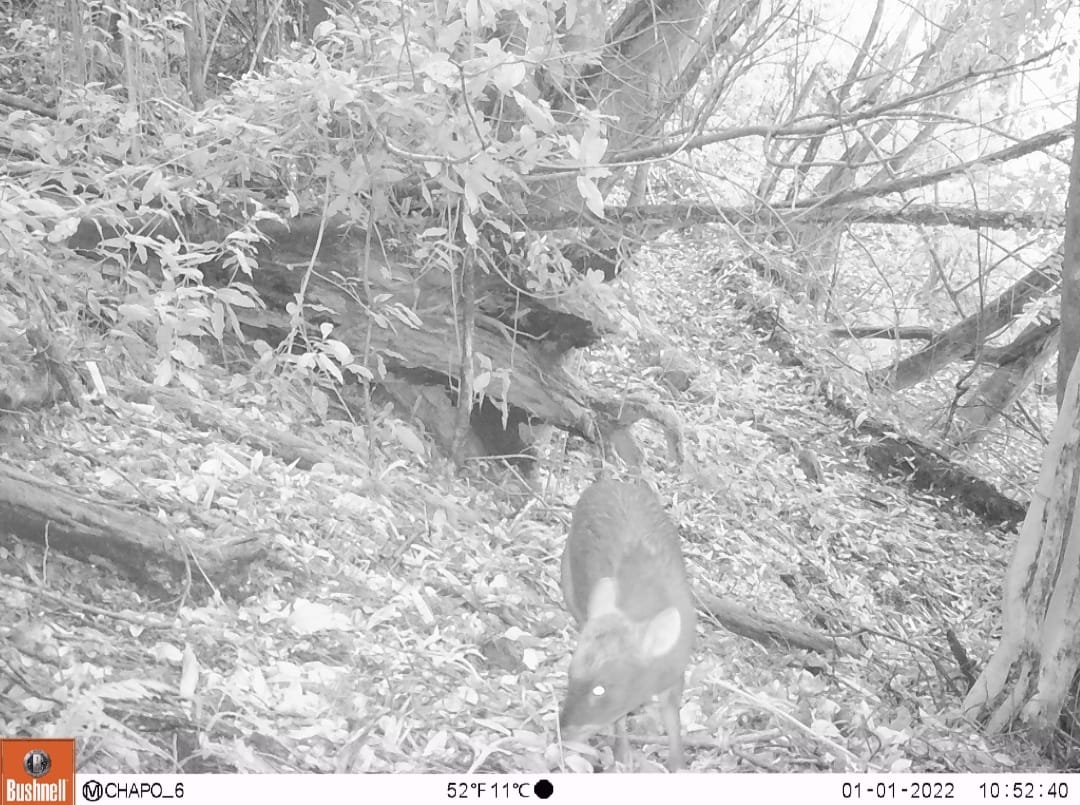

In [ ]:
from IPython.display import Image
Image(path)


Puma
Huiña
Chingue
Pudu
Visón
Huillin
Roedores
Zorro
Quique
Pajaro Chico
Ganado
Ingresar la data cruda que viene una carpeta con un nombre que debe ser modificado (Nombre, fecha inicio-fecha extracción, cordenadas, zona del santuario, tipo ambiente). Si tiene más de una carpeta se deben renombrar todas con el mismo nombre y un .número secuencial.
Después se debe correr el modelo con todos los archivos en formato .jpeg y .jpg para clasificarlas según el modelo. Según clasificación se deben ingresar a carpetas con las etiquetas antes descritas. 
Usuario revisa carpetas creadas
Hay que automatizar el "evento", cada ráfaga de fotos son 3 o 5 arcihvos y tienen delay de 15 minutos. Lo importante es el evento de captura más que las fotos.
La cámara trampa tiene fecha-hora-T°. La hora viene en la última modificación del arcihvo

Hay que solicitar la información tabulada de los puntos donde se pusieron las camaras trampas.
